In [1]:
import numpy as np
from astroquery.sdss import SDSS
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# atlas3d = pd.read_csv("atlas3d_260_earlytype_galaxies.csv")
# atlas3d

In [3]:
df = pd.read_csv("dr16_original.csv")
df

,Name,RA,DEC,mass,host,log_ml,log_l,log_m,host_mass,host_ra,host_dec,host_distance,objid
0,VCC1192,187.376046,7.992843,1.500000e+08,NGC4472,0.746,11.029,11.775,595662143529,187.444860,8.000470,17.14,1237654786779840539
1,VCC-344,184.846192,5.794837,5.610000e+09,NGC4261,0.820,10.793,11.613,410204102987,184.846734,5.824917,29.40,1237654606410285099
2,VCC1627,188.905205,12.382046,1.370000e+08,NGC4552,0.743,10.391,11.134,136144468247,188.915864,12.556342,15.33,1237661949719347370
3,NGC5846cE/J150634.27+013331.6,226.642819,1.558828,2.270000e+09,NGC5846,0.844,10.665,11.509,322849412171,226.620800,1.605600,28.50,1237655468598165525
4,NGC4486B/VCC1297,187.633245,12.490215,4.520000e+09,NGC4486,0.815,10.869,11.684,483058802040,187.705931,12.391123,16.40,1237661812812873761
5,VCC1199,187.395804,8.057988,1.500000e+08,NGC4472,0.746,11.029,11.775,595662143529,187.445800,8.000600,17.14,1237654786779840584
6,VUCD7,187.970395,12.266407,1.640000e+07,NGC4486,0.815,10.869,11.684,483058802040,187.705931,12.391123,16.40,1237658629695733921
7,M59cO,190.480562,11.667721,7.500000e+07,NGC4621,0.759,10.354,11.113,129717927098,190.509675,11.646931,15.35,1237661816022499458
8,VUCD5,187.799501,12.683631,2.160000e+07,NGC4486,0.815,10.869,11.684,483058802040,187.705931,12.391123,16.40,1237658630232539222
9,NGVS-UCD395,187.639285,12.498435,1.260000e+07,NGC4486,0.815,10.869,11.684,483058802040,187.705931,12.391123,16.40,1237661812812873762


In [4]:
host = df['host']
ra_host = df['host_ra']
dec_host = df['host_dec']
host_dist = df['host_distance']
objid_known = df['objid']

In [5]:
print(host_dist)

0     17.14
1     29.40
2     15.33
3     28.50
4     16.40
5     17.14
6     16.40
7     15.35
8     16.40
9     16.40
10    16.40
11    16.40
12    16.40
13    17.14
Name: host_distance, dtype: float64


In [6]:
# querylist = []
# radial_dist = 100
# max_size = 500
# for i in range(len(host)):
#     ra = ra_host[i]
#     dec = dec_host[i]
#     arcmin =  radial_dist/(host_dist[i]*1000)  *360/(2*np.pi)*3600/60 # arcmin
#     arcsec_to_pc = host_dist[i] * 1e6 / 3600 * 2 * np.pi / 360
#     mag_calc = 5*np.log10((host_dist[i]*1e6/10))
   
#     query_temp = f"select p.objID, p.ra, p.dec, p.g, p.i, p.r, p.u, p.z, p.type, p.petroR50_r, p.petroR90_r, p.fracDeV_r, p.deVRad_r, p.expRad_r, p.expAB_r, z1.z as photo_z, w.w1mpro, w.w2mpro, w.w3mpro, w.w4mpro\
#         from photoObj as p JOIN Photoz as z1 on p.objID = z1.objID JOIN WISE_xmatch as a on a.sdss_objid = p.objID JOIN WISE_allsky as w on w.cntr = a.wise_cntr, dbo.fGetNearbyObjEq({ra},{dec},{arcmin}) as n \
#         where p.objID = n.objID and p.type = 3 and p.g - p.i < 1.6 and p.g - p.i > 0.9 and p.u - p.z > 2.7 and p.u - p.z < 3.9 and p.g - p.z > 1.15 and p.g - p.z < 1.85 and p.u - p.g > 1.5 and p.u - p.g < 2.2 and p.z - w.w1mpro BETWEEN 1.5 AND 2.5 and p.z - w.w2mpro BETWEEN 1.4 AND 2.6 and p.z - w.w3mpro BETWEEN 1.3 AND 5.1 and p.z - w.w4mpro BETWEEN 3.7 and 8.6 and p.r - {mag_calc} > -18.5 and p.r - {mag_calc} < -12 and (p.fracDeV_r *  p.deVRad_r + (1 - p.fracDev_r) * p.expRad_r) * {arcsec_to_pc} < {max_size} and p.fracDev_r > 0.7 and z1.z < 0.1 and z1.z > -0.1 and expAB_r > 0.75 and p.z - w.w3mpro < 4.5 and p.z - w.w3mpro > 2"
#     querylist.append(query_temp)
# print(querylist[0])

In [7]:
querylist = []
radial_dist = 300
max_size = 1500
for i in range(len(host)):
    ra = ra_host[i]
    dec = dec_host[i]
    arcmin =  radial_dist/(host_dist[i]*1000)  *360/(2*np.pi)*3600/60 # arcmin
    arcsec_to_pc = host_dist[i] * 1e6 / 3600 * 2 * np.pi / 360
    mag_calc = 5*np.log10((host_dist[i]*1e6/10))
   
    query_temp = f"select p.objID, p.ra, p.dec, p.g, p.i, p.r, p.u, p.z, p.type, p.petroR50_r, p.petroR90_r, p.fracDeV_r, p.deVRad_r, p.expRad_r, p.expAB_r, z1.z as photo_z, w.w1mpro, w.w2mpro, w.w3mpro, w.w4mpro\
        from photoObj as p JOIN Photoz as z1 on p.objID = z1.objID JOIN WISE_xmatch as a on a.sdss_objid = p.objID JOIN WISE_allsky as w on w.cntr = a.wise_cntr, dbo.fGetNearbyObjEq({ra},{dec},{arcmin}) as n \
        where p.objID = n.objID and p.type = 3 and p.r - {mag_calc} > -23 and p.r - {mag_calc} < -8 and (p.fracDeV_r *  p.deVRad_r + (1 - p.fracDev_r) * p.expRad_r) * {arcsec_to_pc} < {max_size} and p.fracDev_r > 0.3 and z1.z < 0.15 and z1.z > -0.1 and expAB_r > 0.2"
    querylist.append(query_temp)
print(querylist[0])

select p.objID, p.ra, p.dec, p.g, p.i, p.r, p.u, p.z, p.type, p.petroR50_r, p.petroR90_r, p.fracDeV_r, p.deVRad_r, p.expRad_r, p.expAB_r, z1.z as photo_z, w.w1mpro, w.w2mpro, w.w3mpro, w.w4mpro        from photoObj as p JOIN Photoz as z1 on p.objID = z1.objID JOIN WISE_xmatch as a on a.sdss_objid = p.objID JOIN WISE_allsky as w on w.cntr = a.wise_cntr, dbo.fGetNearbyObjEq(187.4448598,8.000469819,60.17059692155669) as n         where p.objID = n.objID and p.type = 3 and p.r - 31.1700540879359 > -23 and p.r - 31.1700540879359 < -8 and (p.fracDeV_r *  p.deVRad_r + (1 - p.fracDev_r) * p.expRad_r) * 83.09706494217447 < 1500 and p.fracDev_r > 0.3 and z1.z < 0.15 and z1.z > -0.1 and expAB_r > 0.2


In [8]:
# querylist = []
# radial_dist = 150
# max_size = 700
# for i in range(len(objid_known)):
#     ra = ra_host[i]
#     dec = dec_host[i]
#     arcmin =  radial_dist/(host_dist[i]*1000)  *360/(2*np.pi)*3600/60 # arcmin
#     arcsec_to_pc = host_dist[i] * 1e6 / 3600 * 2 * np.pi / 360
#     mag_calc = 5*np.log10((host_dist[i]*1e6/10))
   
#     query_temp = f"select p.objID, p.ra, p.dec, p.g, p.i, p.r, p.u, p.z, p.type, p.petroR50_r, p.petroR90_r, p.fracDeV_r, p.deVRad_r, p.expRad_r, z1.z as photo_z, s.z as spec_z, p.expAB_r, w.w1mpro, w.w2mpro, w.w3mpro, w.w4mpro\
#         from photoObj as p JOIN Photoz as z1 on p.objID = z1.objID JOIN specObj as s on p.objID = s.bestObjID JOIN WISE_xmatch as a on a.sdss_objid = p.objID JOIN WISE_allsky as w on w.cntr = a.wise_cntr, dbo.fGetNearbyObjEq({ra},{dec},{arcmin}) as n \
#         where p.objID = n.objID and p.type = 3 and p.g - p.i < 1.6 and p.g - p.i > 0.9 and p.u - p.z > 2.7 and p.u - p.z < 3.9 and p.g - p.z > 1.15 and p.g - p.z < 1.85 and p.u - p.g > 1.5 and p.u - p.g < 2.2 and p.r - {mag_calc} > -18.5 and (p.fracDeV_r *  p.deVRad_r + (1 - p.fracDev_r) * p.expRad_r) * {arcsec_to_pc} < {max_size}"
#     querylist.append(query_temp)
    
# print(querylist[0])

In [9]:
objid_list_dr16 = []
ra_list_dr16 = []
dec_list_dr16 = []
obj_per_search_dr16 = []
petro_r50_list_dr16 = []
petro_r90_list_dr16 = []
fracdev_list_dr16 = []
fracexp_list_dr16 = []
devrad_list_dr16 = []
exprad_list_dr16 = []
r_mag_list_dr16 = []
g_mag_list_dr16 = []
i_mag_list_dr16 = []
u_mag_list_dr16 = []
z_mag_list_dr16 = []
z_list_dr16 = []
# z_spec_list_dr16 = []
w1_list_dr16 = []
w2_list_dr16 = []
w3_list_dr16 = []
w4_list_dr16 = []
axis_ratio_list_dr16 = []

for i in range(len(host_dist)):
    results = SDSS.query_sql(querylist[i],timeout = 240) #timeout = 240
    print(results)
    if results == None:
        print('Nothing for index', i)
        obj_per_search_dr16.append(int(0))
    else:
        objid_list_dr16.extend(results['objID'])  
        ra_list_dr16.extend(results['ra'])
        dec_list_dr16.extend(results['dec']) 
        petro_r50_list_dr16.extend(results['petroR50_r'])
        petro_r90_list_dr16.extend(results['petroR90_r'])
        fracdev_list_dr16.extend(results['fracDeV_r'])
        fracexp_list_dr16.extend(1 - results['fracDeV_r'])
        devrad_list_dr16.extend(results['deVRad_r'])
        exprad_list_dr16.extend(results['expRad_r'])
        r_mag_list_dr16.extend(results['r'])
        g_mag_list_dr16.extend(results['g'])
        i_mag_list_dr16.extend(results['i'])
        u_mag_list_dr16.extend(results['u'])
        z_mag_list_dr16.extend(results['z'])
        z_list_dr16.extend(results['photo_z'])
#         z_spec_list_dr16.extend(results['spec_z'])
        w1_list_dr16.extend(results['w1mpro'])
        w2_list_dr16.extend(results['w2mpro'])
        w3_list_dr16.extend(results['w3mpro'])
        w4_list_dr16.extend(results['w4mpro'])
        axis_ratio_list_dr16.extend(results['expAB_r'])
        obj_per_search_dr16.append((len(results['objID'])))

objid_dr16 = np.array(objid_list_dr16)
ra_dr16 = np.array(ra_list_dr16)
dec_dr16 = np.array(dec_list_dr16)
petro_r50_dr16 = np.array(petro_r50_list_dr16)
petro_r90_dr16 = np.array(petro_r90_list_dr16)
fracdev_dr16 = np.array(fracdev_list_dr16) 
fracexp_dr16 = np.array(fracexp_list_dr16) 
devrad_dr16 = np.array(devrad_list_dr16) 
exprad_dr16 = np.array(exprad_list_dr16) 
r_mag_dr16 = np.array(r_mag_list_dr16) 
g_mag_dr16 = np.array(g_mag_list_dr16)
i_mag_dr16 = np.array(i_mag_list_dr16)
u_mag_dr16 = np.array(u_mag_list_dr16)
z_mag_dr16 = np.array(z_mag_list_dr16)
g_i_mag_dr16 = g_mag_dr16 - i_mag_dr16
z_dr16 = np.array(z_list_dr16)
# z_spec_dr16 = np.array(z_spec_list_dr16)
w1_dr16 = np.array(w1_list_dr16)
w2_dr16 = np.array(w2_list_dr16)
w3_dr16 = np.array(w3_list_dr16)
w4_dr16 = np.array(w4_list_dr16)
axis_ratio_dr16 = np.array(axis_ratio_list_dr16)

       objID               ra              dec        ... w2mpro w3mpro w4mpro
------------------- ---------------- ---------------- ... ------ ------ ------
1237661975474208771 186.694429789873 7.40498446155579 ...  9.432  9.414  8.693
1237661975474274359   186.8537513824 7.38319714432408 ...  8.979  8.974  8.627
1237661971186319427 186.819129536473 7.25466056156583 ...  8.324  8.301  8.109
1237661971186385159 186.861852527826 7.27210787657182 ... 14.206 11.855  8.612
1237661975474208799  186.69772765522 7.44172565244919 ...  8.683  8.625  9.012
1237661971723190386 186.699777269748 7.67154016921369 ... 13.028 12.194  8.948
1237661971723190385 186.693853338742 7.67105589876661 ... 13.249 11.882  9.148
1237661971723124891 186.659188608024 7.68107348459671 ... 13.901 11.014  8.626
1237661971723190376 186.684848652438 7.55215292540137 ...  14.07 12.129  8.597
1237661971723190284 186.698009181131 7.68541717357387 ...  14.34 12.021  8.524
                ...              ...              ..

C:\Users\Home\anaconda3\lib\site-packages\astropy\table\table.py:3488: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other


       objID               ra              dec        ... w2mpro w3mpro w4mpro
------------------- ---------------- ---------------- ... ------ ------ ------
1237654605873217742 184.473146618312 5.41144870401632 ... 13.349 12.203  9.195
1237654605873283185 184.508087493868 5.41116176757041 ... 13.635 10.616  8.026
1237655126082912435 184.356120817957 5.56751024078892 ... 13.998 12.548  8.906
1237654605873283233 184.540541614583 5.33149100515855 ... 13.942 12.694  8.922
1237654605873283239 184.545574086729 5.33510615575986 ... 14.104 12.178   8.67
1237655126082977992 184.470355359352 5.44666569263065 ...  14.33 12.385  8.848
1237655126082978014 184.494683312404 5.43044186081705 ... 15.061 12.718  8.774
1237654606410154003 184.539958518081 5.71713737156288 ...  8.933  8.877  8.852
1237655126082977857  184.49747246754 5.59858202318371 ...  11.77 11.445  8.924
1237654606410023111  184.30388914333 5.63926908017963 ... 13.737 11.176  8.376
                ...              ...              ..

       objID               ra              dec        ... w2mpro w3mpro w4mpro
------------------- ---------------- ---------------- ... ------ ------ ------
1237658628623171623 190.697613722962 11.4424807608189 ...  9.065  8.532  7.417
1237661948646326354 190.531356622972 11.5939031816788 ... 15.413 12.365  9.077
1237661816022630579 190.712992066362 11.6211263758452 ... 15.335 12.384  9.038
1237661815485562947 190.315555367971 11.3872402227306 ... 11.221 10.759  8.388
1237658628623040605 190.469098690058 11.4282529853463 ... 12.873 12.148  9.134
1237661815485563078 190.325022626739 11.3580920615889 ... 13.815 11.492  8.565
1237661815485694008 190.489183622902 11.3823069905596 ... 14.098 12.733  8.923
1237661948646195287 190.257112117907 11.5475210770141 ... 14.584 10.204  8.407
1237661948646195258 190.208048998244 11.5762063434801 ... 16.019 12.022  8.031
1237661948646326690 190.484864010256 11.5158489801157 ... 16.226 12.693   9.05
                ...              ...              ..

       objID               ra              dec        ... w2mpro w3mpro w4mpro
------------------- ---------------- ---------------- ... ------ ------ ------
1237658630769672680 188.442683334045 13.0431267739977 ... 16.191  12.09  8.748
1237661950792892770 188.362753262146  13.115218780133 ...  16.33 12.572  8.579
1237658630769541164 188.156623499997 13.0873828446945 ... 10.431 10.415   8.83
1237658630769541226 188.091450931349 13.0880929313984 ... 13.709 10.535  8.671
1237661950255956164 188.210255006009 12.8740715610393 ... 13.915 11.301  8.928
1237658630769475749 188.038148850829 13.0952499425312 ... 14.108 12.472  9.245
1237661813349941341 188.106164900137  12.922221969931 ... 15.532 11.704  8.865
1237661813349810345 187.861116181519 12.9169084860258 ... 12.525  10.58   8.52
1237661950255824987 187.871897097798 12.8753367943992 ... 13.547 10.835  8.616
1237661950255824988  187.87161168828   12.87639703297 ... 13.547 10.835  8.616
                ...              ...              ..

In [108]:
#calculate size of objects given distance of the original it is found near and abs mag
b0=0
r_pc_list_dr16 = []
mv_r_list_dr16 = []
distance_list_dr16 = []
host_galaxy_list_dr16 = []
for i in range(len(objid_known)):
    b1 = b0 + int(obj_per_search_dr16[i])
        #size
    r50_arcsec_dr16 = fracdev_dr16[b0:b1]*devrad_dr16[b0:b1] + fracexp_dr16[b0:b1]*exprad_dr16[b0:b1] 
    r50_pc_dr16 = r50_arcsec_dr16*host_dist[i]*1e6/3600 * 2*np.pi /360
    r_pc_list_dr16.extend(r50_pc_dr16)
    #abs mag of obj
    mv_r_dr16 = r_mag_dr16[b0:b1] - 5*np.log10((host_dist[i]*1e6/10))
    mv_r_list_dr16.extend(mv_r_dr16)
    #distance of galaxies according to the host galaxies
    obj_search_dr16 = obj_per_search_dr16[i]
    distance_list_dr16.extend([host_dist[i]]*obj_search_dr16)
    #host galaxy
    host_galaxy_list_dr16.extend([host[i]]*obj_search_dr16)
    b0 = b1
distance_dr16 = np.array(distance_list_dr16)    
mv_r_dr16 = np.array(mv_r_list_dr16)
r_pc_dr16 = np.array(r_pc_list_dr16)
host_galaxy_list_dr16 = np.array(host_galaxy_list_dr16)

In [109]:
print(r_pc_dr16)

[ 201.00731433  237.75503288  268.85161118 ...   69.25970845 1313.78121615
   16.81771101]


In [77]:
concentration_index_dr16 = petro_r50_dr16/petro_r90_dr16

In [78]:
index_2 = []
for i in range(len(objid_known)):
    index_2a = np.where(objid_known[i] == objid_dr16)[0]
    if len(index_2a) > 0:
        index_2.extend(index_2a)  
    else:
        c1 = 0
index_known_dr16 = np.array(index_2)

In [79]:
print(axis_ratio_dr16[index_known_dr16])

[0.7595184 0.7595184 0.7595184 0.9123216 0.8793265 0.8060865 0.9289402
 0.9289402 0.9289402 0.9289402 0.9289402 0.9289402 0.9289402 0.8679141
 0.8679141 0.8679141 0.8897434 0.8897434 0.8897434 0.8897434 0.8897434
 0.8897434 0.8897434 0.8897434 0.9995907 0.8394813 0.8394813 0.8394813
 0.8394813 0.8394813 0.8394813 0.8394813 0.8394813 0.9134472 0.9134472
 0.9134472 0.9134472 0.9134472 0.9134472 0.9134472 0.7611841 0.7611841
 0.7611841 0.7611841 0.7611841 0.7611841 0.7611841 0.7611841 0.9998984
 0.9998984 0.9998984 0.9998984 0.9998984 0.9998984 0.9998984 0.9993598
 0.9993598 0.9993598]


In [80]:
np.unique(axis_ratio_dr16[index_known_dr16])

array([0.7595184, 0.7611841, 0.8060865, 0.8394813, 0.8679141, 0.8793265,
       0.8897434, 0.9123216, 0.9134472, 0.9289402, 0.9993598, 0.9995907,
       0.9998984])

In [81]:
print(np.unique(objid_dr16[index_known_dr16]))

[1237654606410285099 1237654786779840539 1237654786779840584
 1237655468598165525 1237658629158666684 1237658629695733921
 1237658630232539222 1237661812812873761 1237661812812873762
 1237661816022499458 1237661949719347370 1237661950255825006
 1237661976011407572]


In [82]:
print(objid_known)

0     1237654786779840539
1     1237654606410285099
2     1237661949719347370
3     1237655468598165525
4     1237661812812873761
5     1237654786779840584
6     1237658629695733921
7     1237661816022499458
8     1237658630232539222
9     1237661812812873762
10    1237661950255825006
11    1237658629158666684
12    1237661950792695951
13    1237661976011407572
Name: objid, dtype: int64


In [83]:
# finding index of each unique object
index_unique = []
index_b = []


for i in range(len(objid_known)):
    index_c = []
#     index_e = []
    
    index_b = np.where(objid_known[i] == objid_dr16)[0]
    
    index_b = np.array(index_b)
#     index_unique += index_b[0]
    index_c.extend(index_b)
    print(index_b)
#     print(i)
#     print(index_c)
#     print(len(index_c))
#     print(index_c[0])
#     if len(index_c) >1:
#         index_unique+= index_c[0]
#     else:
#         index_unique += index_c
#     print(index_unique)    
index_unique = np.array(index_unique)

[ 363 2538 7712]
[701]
[964]
[1339]
[1829 3090 4236 4939 5642 6345 7048]
[ 215 2345 7564]
[ 918 1948 3209 4355 5058 5761 6464 7167]
[3447]
[1064 2055 3316 4462 5165 5868 6571 7274]
[2059 3320 4466 5169 5872 6575 7278]
[1229 2122 3383 4529 5232 5935 6638 7341]
[1708 2969 4115 4818 5521 6224 6927]
[]
[ 400 2575 7749]


In [84]:
index_unique1 = [363,701,964,1339,1829,215,918,3447,1064,2059,1229,1708,400]

Text(0.5, 1.0, "SDSS DR16 cE's & UCD's")

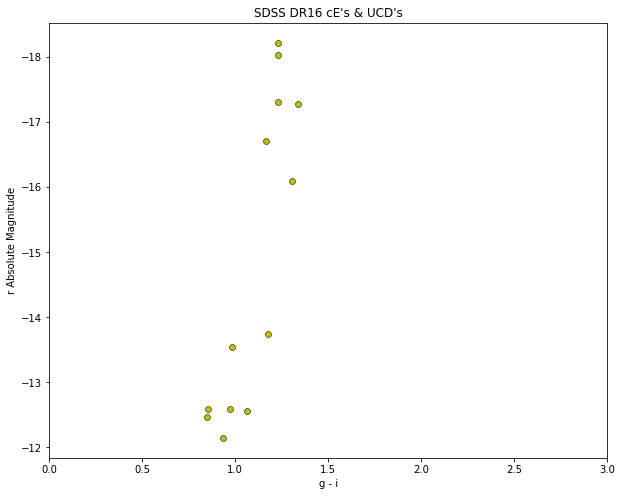

In [85]:
fig1 = plt.figure(figsize=(10,8))

plt.plot(g_i_mag_dr16[index_unique1],mv_r_dr16[index_unique1], 'yo', label = 'Possible contaminant galaxies', markeredgecolor= 'black', markeredgewidth =0.5 , markersize=6)

plt.xlabel('g - i')
plt.ylabel('r Absolute Magnitude')
plt.xlim(0,3)
# plt.ylim(-19,-12)
plt.gca().invert_yaxis()
plt.title("SDSS DR16 cE's & UCD's")


In [113]:
# dictionary of lists  
dict = {'objid': objid_dr16[index_unique1], 'ra': ra_dr16[index_unique1], 'dec': dec_dr16[index_unique1], 'g-i': g_mag_dr16[index_unique1] - i_mag_dr16[index_unique1], 'u-g': u_mag_dr16[index_unique1] - g_mag_dr16[index_unique1], 'u-z': u_mag_dr16[index_unique1] - z_mag_dr16[index_unique1], 'g-z': g_mag_dr16[index_unique1] - z_mag_dr16[index_unique1], 'concentration_index' : concentration_index_dr16[index_unique1], 'photo_z': z_dr16[index_unique1], 'frac_dev': fracdev_dr16[index_unique1], 'host_galaxy': host_galaxy_list_dr16[index_unique1], 'distance': distance_dr16[index_unique1], 'magnitude': mv_r_dr16[index_unique1], 'axis_ratio': axis_ratio_dr16[index_unique1], 'radius': r_pc_dr16[index_unique1], 'w1': w1_dr16[index_unique1], 'w2': w2_dr16[index_unique1],'w3': w3_dr16[index_unique1], 'w4': w4_dr16[index_unique1], 'u_mag': u_mag_dr16[index_unique1],'g_mag':g_mag_dr16[index_unique1],'i_mag':i_mag_dr16[index_unique1],'r_mag':r_mag_dr16[index_unique1],'z_mag': z_mag_dr16[index_unique1]}  
df = pd.DataFrame(dict) 
    
# saving the dataframe 
df.to_csv('dr16_known.csv') 